In [1]:
%pip install ccrvam --upgrade


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


> Make sure to have ccrvam's latest version installed using `pip`. More information about the latest version can be found at https://pypi.org/project/ccrvam/

In [2]:
import numpy as np
from ccrvam import (
    best_subset_ccram,
    all_subsets_ccram
)
from ccrvam import DataProcessor

# 2-Dimensional Case 

### Create Sample Contingency Table

For a 2D contingency table:

- `axis=0`: First variable ($X_1$) with 5 categories
- `axis=1`: Second variable ($X_2$) with 3 categories

The axis indexing follows NumPy's convention, starting from the outermost dimension. The variables are ordered such that:

- $X_1$ corresponds to (rows)
- $X_2$ corresponds to (columns)

This ordering is important for calculating measures of regression association between two variables.

In [3]:
contingency_table = np.array([
    [0, 0, 20],
    [0, 10, 0],
    [20, 0, 0],
    [0, 10, 0],
    [0, 0, 20]
])

### Calculate All Subsets (S)CCRAM

For a 2D contingency table, we can calculate (scaled) CCRAM between $X_1$ (predictor) and $X_2$ (response). Since there's only one possible predictor, this demonstrates the basic functionality.

In [4]:
# Calculate all subsets CCRAM for predicting X2 (axis 2) from X1 (axis 1)
result_2d = all_subsets_ccram(
    contingency_table,
    response=2,  # Predict X2 (columns)
    scaled=False  # Use CCRAM (not scaled)
)

print("=== All Subsets CCRAM Results (2D) ===")
result_2d.results_df


=== All Subsets CCRAM Results (2D) ===


,k,predictors,pred_cate,response,ccram
0,1,"(1,)","(5,)",2,0.84375


In [5]:
# Calculate all subsets SCCRAM for predicting X2 (axis 2) from X1 (axis 1)
result_2d_scaled = all_subsets_ccram(
    contingency_table,
    response=2,  # Predict X2 (columns)
    scaled=True  # Use SCCRAM (scaled)
)

print("=== All Subsets SCCRAM Results (2D) ===")
result_2d_scaled.results_df

=== All Subsets SCCRAM Results (2D) ===


,k,predictors,pred_cate,response,sccram
0,1,"(1,)","(5,)",2,1.0


### Find the Best Subset of Predictors for (S)CCRAM

The `best_subset_ccram` function returns the predictor subset with the highest (S)CCRAM value.


In [6]:
# Find the best subset for predicting X2
best_2d = best_subset_ccram(
    contingency_table,
    response=2,
    scaled=False
)

print("=== Best Subset Result (2D) ===")
best_2d


=== Best Subset Result (2D) ===


BestSubsetCCRAMResult(
  Predictors: (X1)
  Response: X2
  CCRAM: 0.843750
  Number of Predictors (k): 1
  Rank within k=1 subsets: 1/1
)

In [7]:
print("=== Best Subset Summary DataFrame ===")
best_2d.summary_df()

=== Best Subset Summary DataFrame ===


,metric,value
0,Predictors,(X1)
1,Response,X2
2,CCRAM,0.843750
3,Number of Predictors (k),1
4,Rank within k,1
5,Total subsets with k predictors,1


In [8]:
# Find the best subset for predicting X2
best_2d_scaled = best_subset_ccram(
    contingency_table,
    response=2,
    scaled=True
)

print("=== Best Subset Result (2D) ===")
best_2d_scaled


=== Best Subset Result (2D) ===


BestSubsetCCRAMResult(
  Predictors: (X1)
  Response: X2
  SCCRAM: 1.000000
  Number of Predictors (k): 1
  Rank within k=1 subsets: 1/1
)

In [9]:
print("=== Best Subset Summary DataFrame ===")
best_2d_scaled.summary_df()

=== Best Subset Summary DataFrame ===


,metric,value
0,Predictors,(X1)
1,Response,X2
2,SCCRAM,1.000000
3,Number of Predictors (k),1
4,Rank within k,1
5,Total subsets with k predictors,1


# 4-Dimensional Case (Real Data Analysis)

### Load Sample Data in Cases / Frequency Form

This example demonstrates how one can analyze relationships between multiple categorical variables in a clinical dataset of back pain treatments using the `DataProcessor`.

The dataset contains 4 categorical variables from a medical study:

| Variable | Description | Categories |
|----------|-------------|------------|
| X₁ | Length of Previous Attack | 1=Short, 2=Long |
| X₂ | Pain Change | 1=Better, 2=Same, 3=Worse |
| X₃ | Lordosis | 1=Absent/Decreasing, 2=Present/Increasing |
| Pain | Back Pain Outcome | worse (W)=1, same (S)=2, slight.improvement (SI)=3, moderate.improvement (MODI)=4, marked.improvement (MARI)=5, complete.relief (CR)=6 |

1. Define variable names, and dimension tuple (the number of categores of each variable according to the order of the variables defined) 
2. (Optional) If your data has any variables with category names that are not integers, then create a category mapping for non-integer categories (for instance, required for 'pain' variable in the above dataset)
3. Load case-form/freq-form data from file (from path provided as an argument) or type table-form with proper mappings into a contingency table

Citation for the above dataset:
- J. A. Anderson, Regression and ordered categorical variables, Journal of the Royal Statistical Society: Series B (Methodological) 46 (1984)
1–22.

In [10]:
var_list_4d = ["x1", "x2", "x3", "pain"]
category_map_4d = {
    "pain": {
        "worse": 1,
        "same": 2,
        "slight.improvement": 3,
        "moderate.improvement": 4,
        "marked.improvement": 5,
        "complete.relief": 6
    },
}
data_dimension = (2, 3, 2, 6)

rda_contingency_table = DataProcessor.load_data(
                        "./data/caseform.pain.txt",
                        data_form="case_form",
                        dimension=data_dimension,
                        var_list=var_list_4d,
                        category_map=category_map_4d,
                        named=True,
                        delimiter="\t"
                    )
print("Read contingency table from case form data!")
print(rda_contingency_table)

rda_contingency_table_from_freq = DataProcessor.load_data(
                        "./data/freqform.pain.txt",
                        data_form="frequency_form",
                        dimension=data_dimension,
                        var_list=var_list_4d,
                        category_map=category_map_4d,
                        named=True,
                        delimiter="\t"
                    )
print("Read contingency table from frequency form data!")
print(rda_contingency_table_from_freq)

Read contingency table from case form data!
[[[[0 1 0 0 2 4]
   [0 0 0 1 3 0]]

  [[0 2 3 0 6 4]
   [0 1 0 2 0 1]]

  [[0 0 0 0 2 2]
   [0 0 1 1 3 0]]]


 [[[0 0 3 0 1 2]
   [0 1 0 0 3 0]]

  [[0 3 4 5 6 2]
   [1 4 4 3 0 1]]

  [[2 2 1 5 2 0]
   [2 0 2 3 0 0]]]]
Read contingency table from frequency form data!
[[[[0 1 0 0 2 4]
   [0 0 0 1 3 0]]

  [[0 2 3 0 6 4]
   [0 1 0 2 0 1]]

  [[0 0 0 0 2 2]
   [0 0 1 1 3 0]]]


 [[[0 0 3 0 1 2]
   [0 1 0 0 3 0]]

  [[0 3 4 5 6 2]
   [1 4 4 3 0 1]]

  [[2 2 1 5 2 0]
   [2 0 2 3 0 0]]]]


### Calculate All Subsets SCCRAM for Pain Outcome

With 4 dimensions, we have 3 potential predictors ($X_1$, $X_2$, $X_3$) for the Pain outcome ($X_4$). This gives us $\binom{3}{1} + \binom{3}{2} + \binom{3}{3} = 7$ possible predictor subsets.

In [11]:
# Define variable names for better readability in output
variable_names_4d = {
    1: "PrevAttack",
    2: "PainChange", 
    3: "Lordosis",
    4: "Pain"
}

# Calculate all subsets SCCRAM for predicting Pain (variable 4)
result_4d_scaled = all_subsets_ccram(
    rda_contingency_table,
    response=4,  # Predict Pain outcome
    scaled=True, # Use SCCRAM (scaled); default is False (unscaled CCRAM)
    variable_names=variable_names_4d
)

print("=== All Subsets SCCRAM Results (4D) ===")
result_4d_scaled.results_df


=== All Subsets SCCRAM Results (4D) ===


,k,predictors,pred_cate,response,sccram,predictor_names
0,1,"(1,)","(2,)",4,0.146637,(PrevAttack)
1,1,"(2,)","(3,)",4,0.064476,(PainChange)
2,1,"(3,)","(2,)",4,0.046025,(Lordosis)
3,2,"(1, 2)","(2, 3)",4,0.206742,"(PrevAttack, PainChange)"
4,2,"(1, 3)","(2, 2)",4,0.184554,"(PrevAttack, Lordosis)"
5,2,"(2, 3)","(3, 2)",4,0.122244,"(PainChange, Lordosis)"
6,3,"(1, 2, 3)","(2, 3, 2)",4,0.268710,"(PrevAttack, PainChange, Lordosis)"


### Understanding the Tuple Columns (`predictors` and `pred_cate`)

The `results_df` DataFrame includes tuple columns for easy computation:

**Column Descriptions:**
- `predictors`: A tuple of predictor indices (e.g., `(1,)`, `(1, 2)`, `(1, 2, 3)`)
- `pred_cate`: A tuple showing the number of categories for each predictor
  - For example, `(2, 3)` means the first predictor has 2 categories and the second has 3

**Creating Custom Columns:**

Use `.apply()` to apply a function to each tuple in the column as shown below:

**Note:** `df['pred_cate'].apply(np.prod)` applies `np.prod` to each tuple row-by-row, which is different from `np.prod(df['pred_cate'])` (which would fail). The `.apply()` method is necessary because `pandas` library needs to apply the function to each tuple in the column individually, rather than trying to operate on the entire Series as one array.


In [12]:
# Start with the results DataFrame
df = result_4d_scaled.results_df.copy()

# Create custom columns using .apply() on the tuple columns
df['sum_cate'] = df['pred_cate'].apply(sum)        # sum of categories
df['prod_cate'] = df['pred_cate'].apply(np.prod)   # product of categories
df['max_cate'] = df['pred_cate'].apply(max)        # max categories in subset

# Custom calculation: product of (each category - 1)
# Use a lambda to transform each element before computing the product
df['prod_cate_minus1'] = df['pred_cate'].apply(lambda t: np.prod([c - 1 for c in t]))

print("=== Results with Custom Columns ===")
df


=== Results with Custom Columns ===


,k,predictors,pred_cate,response,sccram,predictor_names,sum_cate,prod_cate,max_cate,prod_cate_minus1
0,1,"(1,)","(2,)",4,0.146637,(PrevAttack),2,2,2,1
1,1,"(2,)","(3,)",4,0.064476,(PainChange),3,3,3,2
2,1,"(3,)","(2,)",4,0.046025,(Lordosis),2,2,2,1
3,2,"(1, 2)","(2, 3)",4,0.206742,"(PrevAttack, PainChange)",5,6,3,2
4,2,"(1, 3)","(2, 2)",4,0.184554,"(PrevAttack, Lordosis)",4,4,2,1
5,2,"(2, 3)","(3, 2)",4,0.122244,"(PainChange, Lordosis)",5,6,3,2
6,3,"(1, 2, 3)","(2, 3, 2)",4,0.268710,"(PrevAttack, PainChange, Lordosis)",7,12,3,2


### Get Top Subsets and Filter by k (Number of Predictors per Subset)

The `all_subsets_ccram` method (demonstrated above) returns a `SubsetCCRAMResult` object. This object provides helper methods to explore the results in detail.

**Terminology:**
- **k**: The number of predictors in a subset (e.g., k=2 means pairs of predictors like $(X_1, X_2)$)
- **D**: The total number of available predictors. In this 4D example, D=3 since we have $X_1$, $X_2$, $X_3$ as predictors for the Pain outcome ($X_4$)
- **top**: The number of best subsets to retrieve

**Available Methods:**
- `get_top_subsets(top=3)`: Get the top 3 subsets with highest (S)CCRAM values **across all k values** (global ranking)
- `get_top_subsets_per_k(top=3)`: Get the top 3 subsets **for each k value** separately (k=1, k=2, ..., k=D)
- `get_subsets_by_k(k=2)`: Get **all** subsets with exactly k predictors


In [13]:
# Get top 3 subsets globally (across all k values)
# This returns the 3 subsets with the highest SCCRAM values,
# regardless of how many predictors each subset contains.
print("=== Top 3 Subsets Overall (Global Ranking) ===")
result_4d_scaled.get_top_subsets(top=3)


=== Top 3 Subsets Overall (Global Ranking) ===


,k,predictors,pred_cate,response,sccram,predictor_names
0,3,"(1, 2, 3)","(2, 3, 2)",4,0.268710,"(PrevAttack, PainChange, Lordosis)"
1,2,"(1, 2)","(2, 3)",4,0.206742,"(PrevAttack, PainChange)"
2,2,"(1, 3)","(2, 2)",4,0.184554,"(PrevAttack, Lordosis)"


In [14]:
# Obtain the SCCRAM values for every subset of predictors of size k=2 
print("=== All Subsets with k=2 Predictors ===")
result_4d_scaled.get_subsets_by_k(k=2)

=== All Subsets with k=2 Predictors ===


,k,predictors,pred_cate,response,sccram,predictor_names
0,2,"(1, 2)","(2, 3)",4,0.206742,"(PrevAttack, PainChange)"
1,2,"(1, 3)","(2, 2)",4,0.184554,"(PrevAttack, Lordosis)"
2,2,"(2, 3)","(3, 2)",4,0.122244,"(PainChange, Lordosis)"


### Get Top Subsets for Each Predictor Size k

In practice, researchers often want to obtain the top few subsets **for each predictor size k** rather than globally. The `get_top_subsets_per_k(top)` method addresses this need by returning the top `top` subsets for every value of k from 1 to D (total number of predictors).

**Example:** With D=3 available predictors ($X_1$, $X_2$, $X_3$) and `top=2`:
- For **k=1**: Returns the 2 best single predictors out of $\binom{3}{1} = 3$ possible
- For **k=2**: Returns the 2 best pairs out of $\binom{3}{2} = 3$ possible  
- For **k=3**: Returns the 1 best triplet out of $\binom{3}{3} = 1$ possible (only 1 exists, so returns all)

**Note:** If `top` exceeds the number of possible combinations $\binom{D}{k}$ for a given k, all available combinations for that k are returned.


In [15]:
# Get top 2 subsets for EACH predictor size k
# This returns the best 2 subsets separately for k=1, k=2, and k=3
print("=== Top 2 Subsets for Each k (Per-k Ranking) ===")
result_4d_scaled.get_top_subsets_per_k(top=2)


=== Top 2 Subsets for Each k (Per-k Ranking) ===


,k,predictors,pred_cate,response,sccram,predictor_names
0,1,"(1,)","(2,)",4,0.146637,(PrevAttack)
1,1,"(2,)","(3,)",4,0.064476,(PainChange)
2,2,"(1, 2)","(2, 3)",4,0.206742,"(PrevAttack, PainChange)"
3,2,"(1, 3)","(2, 2)",4,0.184554,"(PrevAttack, Lordosis)"
4,3,"(1, 2, 3)","(2, 3, 2)",4,0.268710,"(PrevAttack, PainChange, Lordosis)"


### Visualize All Subsets (S)CCRAM Values

The `plot_subsets` method provides a visual overview of all (S)CCRAM values across different numbers of predictors (k). This visualization is particularly useful when the number of predictors is large and you need to decide which k value to focus on when exploring "Top Subsets" results.

Key features:
- **Y-axis**: (S)CCRAM value for each subset
- **X-axis**: Number of predictors (k)
- **Labels**: The best predictor combination for each k is labeled above its point


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'All Subset SCCRAM Values by Number of Predictors\n(Response = X4)'}, xlabel='Number of Predictors (k)', ylabel='SCCRAM Value'>)

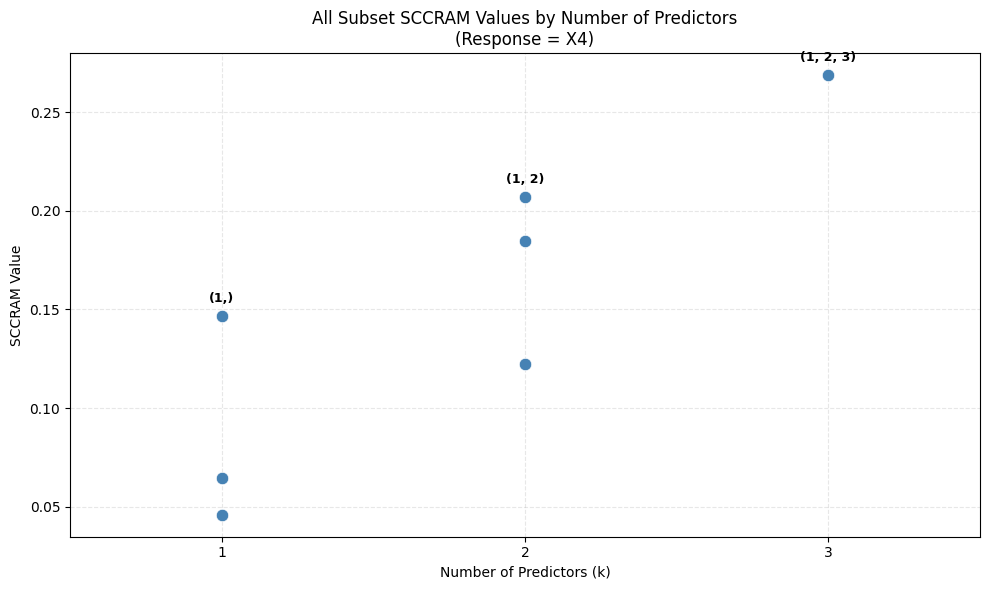

In [16]:
# Plot all subsets with best predictor combination labeled for each k
result_4d_scaled.plot_subsets()

(<Figure size 1000x800 with 1 Axes>,
 <Axes: title={'center': 'SCCRAM Values by Number of Predictors\n(Response: Pain Outcome)'}, xlabel='Number of Predictors (k)', ylabel='SCCRAM Value'>)

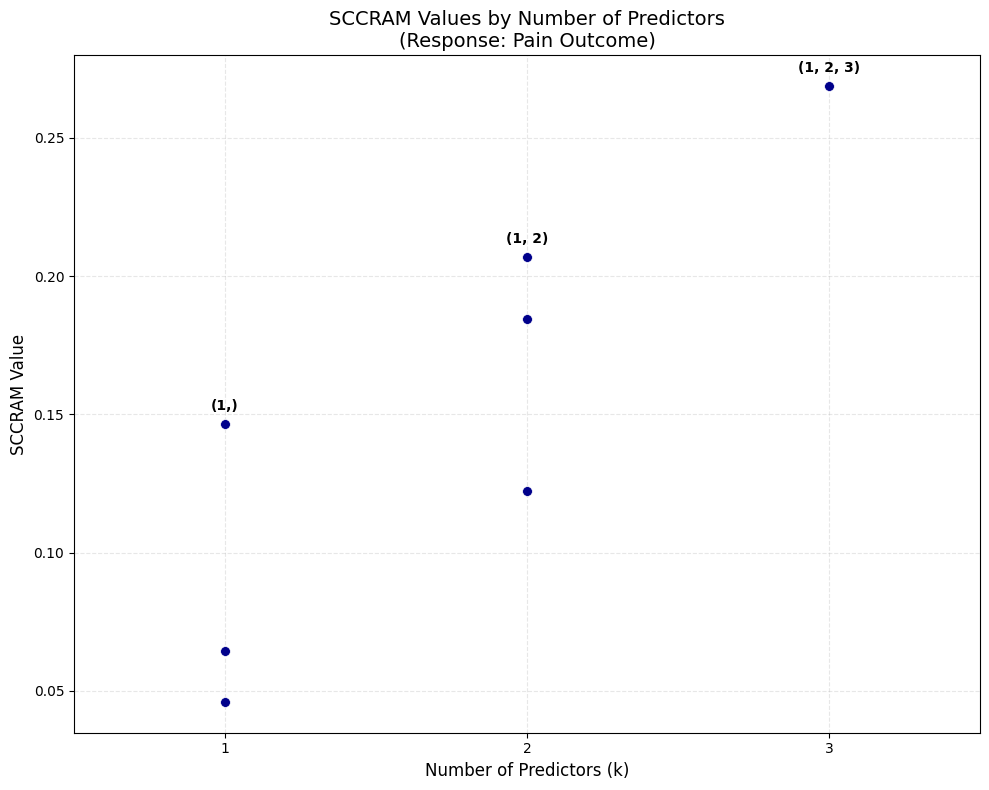

In [17]:
# Customized plot with custom title and styling
result_4d_scaled.plot_subsets(
    figsize=(10, 8),
    point_size=50,
    point_color='darkblue',
    title="SCCRAM Values by Number of Predictors\n(Response: Pain Outcome)",
    title_fontsize=14,
    xlabel_fontsize=12,
    ylabel_fontsize=12,
    label_fontsize=10
)

### Find Best Subset with Fixed k

You can also find the best subset constrained to a specific number of predictors using the option `k`.


In [18]:
# Find best subset with exactly k=1 predictor
best_k1_scaled = best_subset_ccram(
    rda_contingency_table,
    response=4,
    scaled=True, # Use SCCRAM (scaled); default is False (unscaled CCRAM)
    k=1,  # Constrain to single predictor
    variable_names=variable_names_4d
)

print("=== Best Single Predictor (k=1) ===")
best_k1_scaled


=== Best Single Predictor (k=1) ===


BestSubsetCCRAMResult(
  Predictors: (X1)
  Response: X4
  SCCRAM: 0.146637
  Number of Predictors (k): 1
  Rank within k=1 subsets: 1/3
)

In [19]:
# Find best subset with exactly k=2 predictors
best_k2_scaled = best_subset_ccram(
    rda_contingency_table,
    response=4,
    scaled=True, # Use SCCRAM (scaled); default is False (unscaled CCRAM)
    k=2,  # Constrain to two predictors
    variable_names=variable_names_4d
)

print("=== Best Two-Predictor Subset (k=2) ===")
best_k2_scaled

=== Best Two-Predictor Subset (k=2) ===


BestSubsetCCRAMResult(
  Predictors: (X1, X2)
  Response: X4
  SCCRAM: 0.206742
  Number of Predictors (k): 2
  Rank within k=2 subsets: 1/3
)